In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2023-08-11 00:01:59.284300: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 00:01:59.402687: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-08-11 00:01:59.898274: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:
2023-08-11 00:01:59.898330: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255

60000 10000 (28, 28)


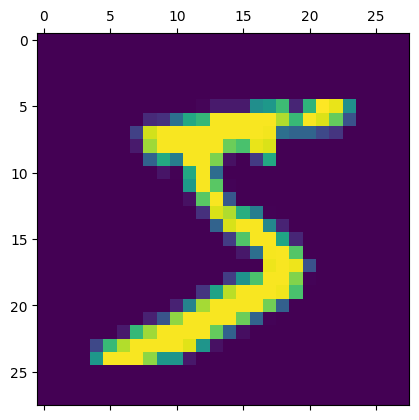

In [3]:
print(len(X_train),len(X_test),X_train[0].shape,)
plt.matshow(X_train[0])

In [4]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [5]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

2023-08-11 00:02:01.151630: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-11 00:02:01.187706: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-11 00:02:01.188009: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-11 00:02:01.188592: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/5
 183/1875 [=>............................] - ETA: 1s - loss: 1.1163 - accuracy: 0.7258

2023-08-11 00:02:02.715563: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1875/1875 [==============================] - 2s 845us/step - loss: 0.4674 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 2s 879us/step - loss: 0.3041 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 2s 933us/step - loss: 0.2837 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 2s 883us/step - loss: 0.2730 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 2s 852us/step - loss: 0.2666 - accuracy: 0.9260


In [6]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2673 - accuracy: 0.9253


[0.26734256744384766, 0.9253000020980835]

In [7]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

313/313 [==============================] - 0s 649us/step


Text(95.72222222222221, 0.5, 'Truth')

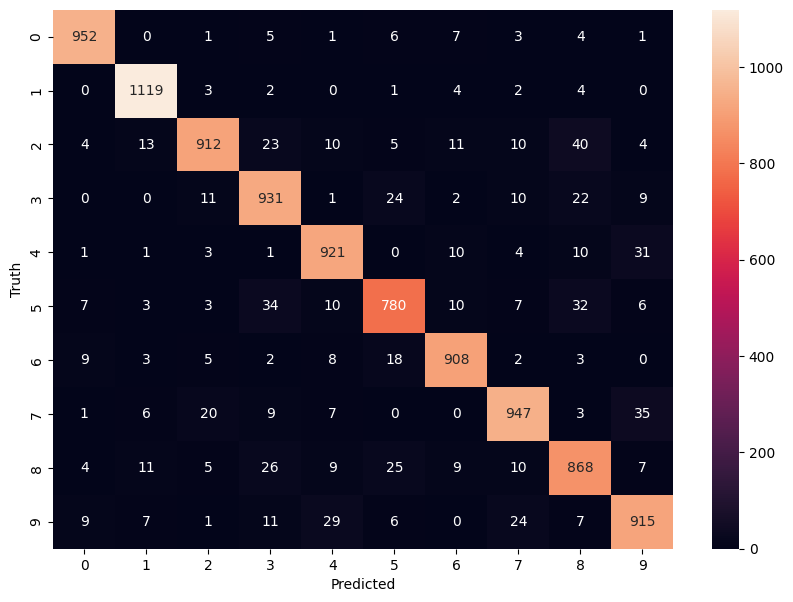

In [8]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Truth')

In [9]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 928us/step - loss: 0.2783 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 2s 962us/step - loss: 0.1262 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 2s 928us/step - loss: 0.0883 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 2s 937us/step - loss: 0.0672 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 2s 943us/step - loss: 0.0528 - accuracy: 0.9830


In [10]:

model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 881us/step - loss: 0.0791 - accuracy: 0.9763


[0.07911551743745804, 0.9763000011444092]

313/313 [==============================] - 0s 603us/step


Text(95.72222222222221, 0.5, 'Truth')

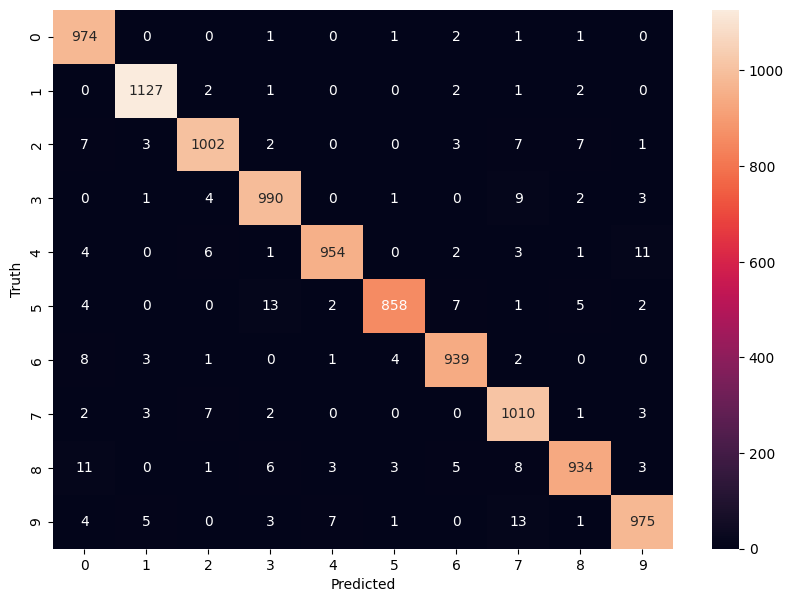

In [11]:

y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [12]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 2s 903us/step - loss: 0.2721 - accuracy: 0.9223
Epoch 2/100
1875/1875 [==============================] - 2s 915us/step - loss: 0.1228 - accuracy: 0.9639
Epoch 3/100
1875/1875 [==============================] - 2s 903us/step - loss: 0.0861 - accuracy: 0.9745
Epoch 4/100
1875/1875 [==============================] - 2s 902us/step - loss: 0.0661 - accuracy: 0.9804
Epoch 5/100
1875/1875 [==============================] - 2s 918us/step - loss: 0.0516 - accuracy: 0.9844
Epoch 6/100
1875/1875 [==============================] - 2s 918us/step - loss: 0.0424 - accuracy: 0.9866
Epoch 7/100
1875/1875 [==============================] - 2s 895us/step - loss: 0.0343 - accuracy: 0.9892
Epoch 8/100
1875/1875 [==============================] - 2s 907us/step - loss: 0.0291 - accuracy: 0.9905
Epoch 9/100
1875/1875 [==============================] - 2s 911us/step - loss: 0.0240 - accuracy: 0.9923
Epoch 10/100
1875/1875 [==============================]

In [13]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 902us/step - loss: 0.2495 - accuracy: 0.9779


[0.2494782656431198, 0.9779000282287598]